In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import set_config

In [118]:
df = pd.read_csv(r"../dataset/panic_disorder_dataset_training.csv")

In [119]:
df.shape

(100000, 17)

In [120]:
df.sample(5)

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
84523,84524,32,Female,Yes,No,Low,Panic attacks,Moderate,Mild,Rural,Asthma,Bipolar disorder,Drugs,Seeking therapy,High,Sleep quality,0
53837,53838,59,Female,No,Yes,Moderate,Fear of losing control,Moderate,Mild,Rural,Asthma,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
89723,89724,59,Male,Yes,Yes,High,Panic attacks,Mild,Moderate,Urban,Diabetes,Depressive disorder,Alcohol,Socializing,Moderate,Exercise,0
35776,35777,31,Male,Yes,Yes,Low,Dizziness,Severe,Moderate,Rural,Asthma,Bipolar disorder,Drugs,Exercise,High,Diet,0
34379,34380,28,Male,Yes,No,Low,Chest pain,Mild,Mild,Urban,Heart disease,NaN,Alcohol,Meditation,Moderate,Diet,0


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [122]:
columns = ['Gender','Family History','Personal History',
           'Current Stressors','Symptoms','Severity',
           'Impact on Life','Demographics','Medical History',
           'Psychiatric History','Substance Use','Coping Mechanisms',
           'Social Support','Lifestyle Factors']
for column in columns:
    print('Number of Unique Values in',column,'=',df[column].nunique())

Number of Unique Values in Gender = 2
Number of Unique Values in Family History = 2
Number of Unique Values in Personal History = 2
Number of Unique Values in Current Stressors = 3
Number of Unique Values in Symptoms = 5
Number of Unique Values in Severity = 3
Number of Unique Values in Impact on Life = 3
Number of Unique Values in Demographics = 2
Number of Unique Values in Medical History = 3
Number of Unique Values in Psychiatric History = 3
Number of Unique Values in Substance Use = 2
Number of Unique Values in Coping Mechanisms = 4
Number of Unique Values in Social Support = 3
Number of Unique Values in Lifestyle Factors = 3


In [123]:
df_No = df
columns = ['Gender','Family History','Personal History','Current Stressors','Symptoms','Severity','Impact on Life','Demographics','Medical History','Psychiatric History','Substance Use','Coping Mechanisms','Social Support','Lifestyle Factors']
# Create a dictionary that maps each categorical value to a unique integer
mapping = {}
category = ''
encoding = 0
for column in columns:
    unique_values = df[column].unique()
    print('-'*30)
    print('column = ',column)
    for i, value in enumerate(unique_values):
        mapping[value] = i
        category = value
        encoding = i
        print('category = ',category, '(',encoding,')')
        
df_No = df_No.replace(mapping)

------------------------------
column =  Gender
category =  Male ( 0 )
category =  Female ( 1 )
------------------------------
column =  Family History
category =  No ( 0 )
category =  Yes ( 1 )
------------------------------
column =  Personal History
category =  Yes ( 0 )
category =  No ( 1 )
------------------------------
column =  Current Stressors
category =  Moderate ( 0 )
category =  High ( 1 )
category =  Low ( 2 )
------------------------------
column =  Symptoms
category =  Shortness of breath ( 0 )
category =  Panic attacks ( 1 )
category =  Chest pain ( 2 )
category =  Dizziness ( 3 )
category =  Fear of losing control ( 4 )
------------------------------
column =  Severity
category =  Mild ( 0 )
category =  Moderate ( 1 )
category =  Severe ( 2 )
------------------------------
column =  Impact on Life
category =  Mild ( 0 )
category =  Significant ( 1 )
category =  Moderate ( 2 )
------------------------------
column =  Demographics
category =  Rural ( 0 )
category =  Urba

C:\Users\HandaZa\AppData\Local\Temp\ipykernel_10296\2343405525.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_No = df_No.replace(mapping)


<Axes: >

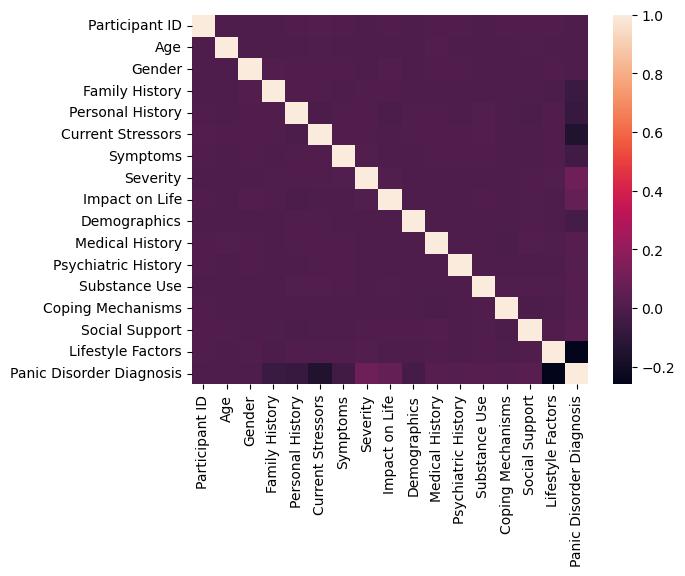

In [124]:
sns.heatmap(df_No.corr())

In [125]:
df_No.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Participant ID            100000 non-null  int64
 1   Age                       100000 non-null  int64
 2   Gender                    100000 non-null  int64
 3   Family History            100000 non-null  int64
 4   Personal History          100000 non-null  int64
 5   Current Stressors         100000 non-null  int64
 6   Symptoms                  100000 non-null  int64
 7   Severity                  100000 non-null  int64
 8   Impact on Life            100000 non-null  int64
 9   Demographics              100000 non-null  int64
 10  Medical History           100000 non-null  int64
 11  Psychiatric History       100000 non-null  int64
 12  Substance Use             100000 non-null  int64
 13  Coping Mechanisms         100000 non-null  int64
 14  Social Support       

In [126]:
df_No.drop(labels="Participant ID", axis =1)

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,38,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,51,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0
2,32,1,0,1,0,1,0,1,1,0,2,0,2,1,1,0
3,64,1,1,1,1,2,1,1,0,0,0,0,3,0,1,0
4,31,0,0,1,1,1,0,1,0,1,0,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,0,0,1,0,2,0,0,0,3,0,0,0,2,2,0
99996,57,1,1,0,2,1,2,0,0,3,2,0,3,0,2,0
99997,20,0,0,1,1,1,2,1,0,3,0,0,2,2,1,0
99998,56,1,0,0,0,2,2,0,0,0,1,1,0,0,0,1


In [127]:
df_No.duplicated().sum()

0

In [128]:
df_No.describe().T

,count,mean,std,min,25%,50%,75%,max
Participant ID,100000.0,50000.50000,28867.657797,1.0,25000.75,50000.5,75000.25,100000.0
Age,100000.0,41.45430,13.839204,18.0,29.00,41.0,53.00,65.0
Gender,100000.0,0.49948,0.500002,0.0,0.00,0.0,1.00,1.0
Family History,100000.0,0.49958,0.500002,0.0,0.00,0.0,1.00,1.0
Personal History,100000.0,0.50210,0.499998,0.0,0.00,1.0,1.00,1.0
Current Stressors,100000.0,1.00040,0.817182,0.0,0.00,1.0,2.00,2.0
Symptoms,100000.0,2.00928,1.416529,0.0,1.00,2.0,3.00,4.0
Severity,100000.0,1.00145,0.817774,0.0,0.00,1.0,2.00,2.0
Impact on Life,100000.0,0.66548,0.471825,0.0,0.00,1.0,1.00,1.0
Demographics,100000.0,0.49913,0.500002,0.0,0.00,0.0,1.00,1.0


## Try ML Models


In [129]:
x_train,x_test,y_train,y_test = train_test_split(df_No.drop(columns = ['Panic Disorder Diagnosis','Participant ID'] , axis = 1)
                                                 , df_No['Panic Disorder Diagnosis']
                                                 , test_size = 0.3
                                                , random_state=42, shuffle=True)


In [130]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70000, 15)
(70000,)
(30000, 15)
(30000,)


### 1 SVM

In [131]:
tf1_lr = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,16))])
svm = SVC(kernel='linear')


pipe_svm = Pipeline([('StandardScaler',tf1_lr),('Support Vector Machine',svm)])

pipe_svm.fit(x_train,y_train)

y_pred_svm = pipe_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

set_config(display='diagram')
pipe_svm

Accuracy: 0.957


Pipeline(steps=[('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 16, None))])),
                ('Support Vector Machine', SVC(kernel='linear'))])

### 2 DecisionTreeClassifier

In [132]:
tf1_dtc = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,16))])
dtc = DecisionTreeClassifier()


pipe_dtc = Pipeline([('StandardScaler',tf1_dtc),('Decision Tree Classifier',dtc)])

pipe_dtc.fit(x_train,y_train)

y_pred_dtc = pipe_dtc.predict(x_test)
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", accuracy_dtc)
set_config(display='diagram')
pipe_dtc

Accuracy: 0.9736666666666667


Pipeline(steps=[('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 16, None))])),
                ('Decision Tree Classifier', DecisionTreeClassifier())])

### 3 RandomForestClassifier

In [133]:
tf1_rfc = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,16))])
rfc = RandomForestClassifier()


pipe_rfc = Pipeline([('StandardScaler',tf1_rfc),('Random Forest Classifier',rfc)])

pipe_rfc.fit(x_train,y_train)

y_pred_rfc = pipe_rfc.predict(x_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Accuracy:", accuracy_rfc)

set_config(display='diagram')
pipe_rfc

Accuracy: 0.9761


Pipeline(steps=[('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 16, None))])),
                ('Random Forest Classifier', RandomForestClassifier())])

### 4 XGBoost Classifier

In [134]:
tf1_xgc = ColumnTransformer([('Standard Scaler', StandardScaler(), slice(0,16))])
xgc = XGBClassifier()


pipe_xgc = Pipeline([('StandardScaler',tf1_xgc),('XG Boost Classifier',xgc)])

pipe_xgc.fit(x_train,y_train)

y_pred_xgc = pipe_xgc.predict(x_test)
accuracy_xgc = accuracy_score(y_test, y_pred_xgc)
print("Accuracy:", accuracy_xgc)

set_config(display='diagram')
pipe_xgc

Accuracy: 0.9766333333333334


Pipeline(steps=[('StandardScaler',
                 ColumnTransformer(transformers=[('Standard Scaler',
                                                  StandardScaler(),
                                                  slice(0, 16, None))])),
                ('XG Boost Classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               f..._policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

* best accuracy is of XGBoost Classifier which is 97.66 %
### Import Test Dataset to evaluate performance of XGBosst Classifier

In [135]:
test = pd.read_csv(r"../dataset/panic_disorder_dataset_testing.csv")

In [136]:
test.shape

(20000, 17)

In [137]:
test.sample(2)

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
17594,17595,54,Female,Yes,Yes,High,Chest pain,Mild,Moderate,Urban,Diabetes,Anxiety disorder,NaN,Socializing,Low,Sleep quality,0
19458,19459,20,Male,No,No,High,Shortness of breath,Moderate,Mild,Rural,Asthma,Anxiety disorder,Drugs,Meditation,High,Diet,0


In [138]:
test_No = test
columns = ['Gender','Family History','Personal History','Current Stressors','Symptoms','Severity','Impact on Life','Demographics','Medical History','Psychiatric History','Substance Use','Coping Mechanisms','Social Support','Lifestyle Factors']
# Create a dictionary that maps each categorical value to a unique integer
mapping = {}
category = ''
encoding = 0
for column in columns:
    unique_values = df[column].unique()
    print('-'*30)
    print('column = ',column)
    for i, value in enumerate(unique_values):
        mapping[value] = i
        category = value
        encoding = i
        print('category = ',category, '(',encoding,')')
        
test_No = test_No.replace(mapping)

------------------------------
column =  Gender
category =  Male ( 0 )
category =  Female ( 1 )
------------------------------
column =  Family History
category =  No ( 0 )
category =  Yes ( 1 )
------------------------------
column =  Personal History
category =  Yes ( 0 )
category =  No ( 1 )
------------------------------
column =  Current Stressors
category =  Moderate ( 0 )
category =  High ( 1 )
category =  Low ( 2 )
------------------------------
column =  Symptoms
category =  Shortness of breath ( 0 )
category =  Panic attacks ( 1 )
category =  Chest pain ( 2 )
category =  Dizziness ( 3 )
category =  Fear of losing control ( 4 )
------------------------------
column =  Severity
category =  Mild ( 0 )
category =  Moderate ( 1 )
category =  Severe ( 2 )
------------------------------
column =  Impact on Life
category =  Mild ( 0 )
category =  Significant ( 1 )
category =  Moderate ( 2 )
------------------------------
column =  Demographics
category =  Rural ( 0 )
category =  Urba

C:\Users\HandaZa\AppData\Local\Temp\ipykernel_10296\824788174.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_No = test_No.replace(mapping)


In [139]:
test_No.sample(2)

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
17695,17696,62,0,0,1,0,2,1,0,1,0,1,1,0,2,1,0
8976,8977,44,0,0,1,1,3,0,1,1,1,2,1,2,0,1,0


* evaluate performance of model on test dataset

In [140]:
x_test1 = test_No.drop(columns = ['Panic Disorder Diagnosis','Participant ID'] , axis = 1)
y_test1 = test_No['Panic Disorder Diagnosis']

In [141]:
x_test1.shape

(20000, 15)

In [142]:
y_test1.shape

(20000,)

In [143]:
y_pred_x_test1 = pipe_xgc.predict(x_test1) 

In [144]:
accuracy_xgc = accuracy_score(y_test1, y_pred_x_test1)
print('Accuracy of XGBoost Classifier on Test Dataset = ', accuracy_xgc)

Accuracy of XGBoost Classifier on Test Dataset =  0.9762


In [145]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test1, y_pred_x_test1 )
cr = classification_report(y_test1, y_pred_x_test1 )

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[18941   218]
 [  258   583]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19159
           1       0.73      0.69      0.71       841

    accuracy                           0.98     20000
   macro avg       0.86      0.84      0.85     20000
weighted avg       0.98      0.98      0.98     20000



## Saving the Model XGBosst Classifier

In [150]:
import joblib

# Save the trained model to a file
joblib.dump(pipe_xgc, 'xgboost_model1.pkl')

['xgboost_model1.pkl']